<a href="https://colab.research.google.com/github/SoukainaElidrissi/test/blob/main/Atelier4EXx1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mnist-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F102285%2F242592%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T150025Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D64e1850f73441e7e69a5a964908b826784dd7e41e61c6c8b6e4571bd73a91b05b3a330c9b3957da06faaeb5b9dd418b96810bcc808292ef81b11e77e57068f6980f36207e202c58eef162031fa8e98fa977e2d39f2a20636cccf736a84f1a958c72df3954a6f92a0c95a9225243ea3e1fdd0a5e4461067c43ef83a8c6673d4a59f2bc45c04dc1466da49d22aec4273a2742c1d87f1997e8d14f5f1dad0f2a04b6d00e0982783c5d0342445eb9fb7ca8d57b2b4586ade500bbba32763ab9ceb649e4ef32bab149bf8e5898a09bcd64aef2dc564e9c31b66371434c5a9980fbe409c7c1cc2876c6bbdc37818bcecc8aff8f6e679536653cdb000fa8d4ec12ee003'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 23112702 bytes downloaded
Downloaded and uncompressed: mnist-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte


In [ ]:

import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms


import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd


torch.manual_seed(42)

In [ ]:
transform = transforms.ToTensor()

# **FOR** **Auto**-**encoder**

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
valid_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 110326346.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 37772277.46it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33769825.42it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5686725.01it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=100)


In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_size=28 * 28, hidden_size1=128, hidden_size2=16, z_dim=2):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, z_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class Decoder(nn.Module):
    def __init__(self, output_size=28 * 28, hidden_size1=128, hidden_size2=16, z_dim=2):
        super().__init__()
        self.fc1 = nn.Linear(z_dim, hidden_size2)
        self.fc2 = nn.Linear(hidden_size2, hidden_size1)
        self.fc3 = nn.Linear(hidden_size1, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

enc = Encoder().to(device)
dec = Decoder().to(device)

In [ ]:
loss_fn = nn.MSELoss()
optimizer_enc = torch.optim.Adam(enc.parameters())
optimizer_dec = torch.optim.Adam(dec.parameters())

train_loss = []
num_epochs = 10

In [ ]:

for epoch in range(num_epochs):
    train_epoch_loss = 0
    print(f'epoch: {epoch}')
    for (imgs, _) in train_dl:
        imgs = imgs.to(device)
        imgs = imgs.flatten(1)
        latents = enc(imgs)
        output = dec(latents)
        loss = loss_fn(output, imgs)
        train_epoch_loss += loss.cpu().detach().numpy()
        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()
        loss.backward()
        optimizer_enc.step()
        optimizer_dec.step()

    train_loss.append(train_epoch_loss)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9


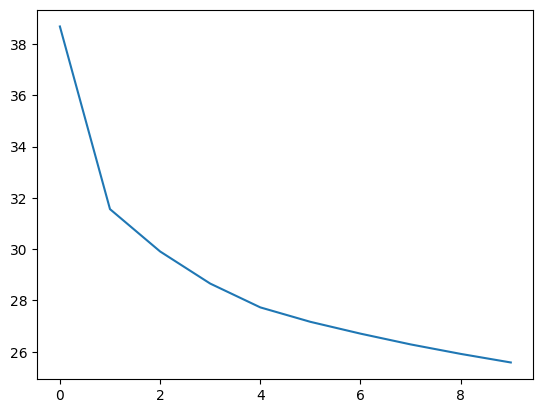

In [ ]:
plt.plot(train_loss)

In [ ]:
values = None
all_labels = []

with torch.no_grad():
    for (imgs, labels) in train_dl:
        imgs = imgs.to(device)
        imgs = imgs.flatten(1)
        all_labels.extend(list(labels.numpy()))
        latents = enc(imgs)

        if values is None:
            values = latents.cpu()
        else:
            values = torch.vstack([values, latents.cpu()])

In [ ]:
cmap = plt.get_cmap('viridis', 10)

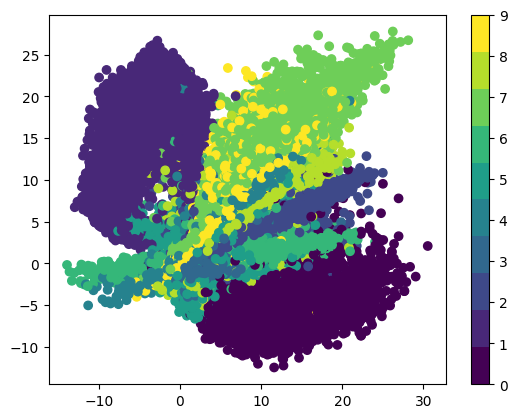

In [ ]:
all_labels = np.array(all_labels)
values = values.numpy()
pc = plt.scatter(values[:, 0], values[:, 1], c=all_labels, cmap=cmap)
plt.colorbar(pc)


In [ ]:
batch_size = 128
learning_rate = 0.001
epochs = 20
latent_dim = 32

In [ ]:
train_data = pd.read_csv('/content/sample_data/mnist_train_small.csv').values
test_data = pd.read_csv('/content/sample_data/mnist_test.csv').values


In [ ]:
train_features, train_labels = train_data[:, 1:], train_data[:, 0]
test_features, test_labels = test_data[:, 1:], test_data[:, 0]

In [ ]:
train_features = torch.FloatTensor(train_features) / 255.0
test_features = torch.FloatTensor(test_features) / 255.0
train_labels = torch.LongTensor(train_labels)
test_labels = torch.LongTensor(test_labels)

In [ ]:
train_dataset = TensorDataset(train_features, train_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_dim, latent_dim), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(latent_dim, input_dim), nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
autoencoder_model = Autoencoder(input_dim=784, latent_dim=latent_dim)
autoencoder_optimizer = optim.Adam(autoencoder_model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

In [ ]:
def train_autoencoder(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    losses = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            inputs, _ = data

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        epoch_loss /= len(train_loader.dataset)
        losses.append(epoch_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return losses


In [ ]:
losses = train_autoencoder(autoencoder_model, train_loader, criterion, autoencoder_optimizer, epochs)

Epoch [1/20], Loss: 0.0026
Epoch [2/20], Loss: 0.0016
Epoch [3/20], Loss: 0.0014
Epoch [4/20], Loss: 0.0013
Epoch [5/20], Loss: 0.0012
Epoch [6/20], Loss: 0.0011
Epoch [7/20], Loss: 0.0010
Epoch [8/20], Loss: 0.0010
Epoch [9/20], Loss: 0.0009
Epoch [10/20], Loss: 0.0009
Epoch [11/20], Loss: 0.0009
Epoch [12/20], Loss: 0.0009
Epoch [13/20], Loss: 0.0009
Epoch [14/20], Loss: 0.0008
Epoch [15/20], Loss: 0.0008
Epoch [16/20], Loss: 0.0008
Epoch [17/20], Loss: 0.0008
Epoch [18/20], Loss: 0.0008
Epoch [19/20], Loss: 0.0008
Epoch [20/20], Loss: 0.0008


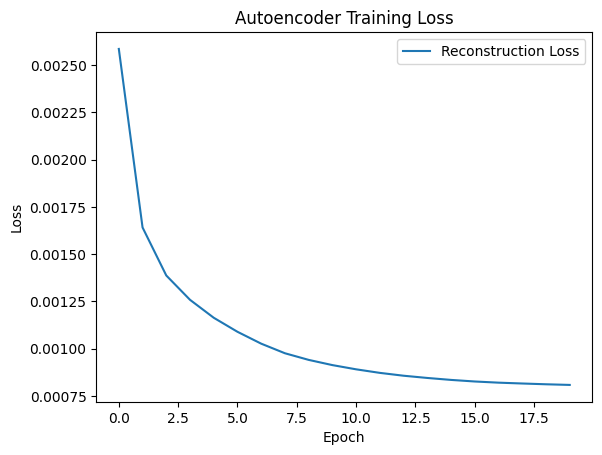

In [ ]:
plt.plot(losses, label='Reconstruction Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.show()

#**FOR** **Variational    Auto**-**encoders**

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc21 = nn.Linear(256, latent_dim)
        self.fc22 = nn.Linear(256, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 256)
        self.fc4 = nn.Linear(256, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc21(h), self.fc22(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

In [ ]:
vae_model = VAE(input_dim=784, latent_dim=latent_dim)
vae_optimizer = optim.Adam(vae_model.parameters(), lr=learning_rate)


In [ ]:
def train_vae(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    losses = []
    kl_divergences = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        epoch_kl_divergence = 0.0
        for data in train_loader:
            inputs, _ = data

            optimizer.zero_grad()
            outputs, mu, logvar = model(inputs)
            loss = criterion(outputs, inputs, mu, logvar)

            KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_kl_divergence += KLD.item()

        epoch_loss /= len(train_loader.dataset)
        epoch_kl_divergence /= len(train_loader.dataset)
        losses.append(epoch_loss)
        kl_divergences.append(epoch_kl_divergence)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, KL Divergence: {epoch_kl_divergence:.4f}')

    return losses, kl_divergences

In [ ]:
vae_losses, vae_kl_divergences = train_vae(vae_model, train_loader, vae_loss, vae_optimizer, epochs)

Epoch [1/20], Loss: 225.5099, KL Divergence: 11.0234
Epoch [2/20], Loss: 161.1622, KL Divergence: 15.6376
Epoch [3/20], Loss: 145.0010, KL Divergence: 18.6043
Epoch [4/20], Loss: 135.6190, KL Divergence: 20.7035
Epoch [5/20], Loss: 129.5909, KL Divergence: 21.9879
Epoch [6/20], Loss: 125.2991, KL Divergence: 22.8345
Epoch [7/20], Loss: 122.0144, KL Divergence: 23.4787
Epoch [8/20], Loss: 119.7653, KL Divergence: 23.9298
Epoch [9/20], Loss: 117.8286, KL Divergence: 24.3385
Epoch [10/20], Loss: 116.2233, KL Divergence: 24.5439
Epoch [11/20], Loss: 115.1465, KL Divergence: 24.8610
Epoch [12/20], Loss: 114.0292, KL Divergence: 25.0231
Epoch [13/20], Loss: 113.2393, KL Divergence: 25.2572
Epoch [14/20], Loss: 112.4123, KL Divergence: 25.3028
Epoch [15/20], Loss: 111.7954, KL Divergence: 25.4387
Epoch [16/20], Loss: 111.1872, KL Divergence: 25.5420
Epoch [17/20], Loss: 110.7462, KL Divergence: 25.6339
Epoch [18/20], Loss: 110.2144, KL Divergence: 25.6755
Epoch [19/20], Loss: 109.7901, KL Div

In [ ]:
def get_autoencoder_latent_representation(model, data_loader):
    model.eval()
    latent_space = []
    with torch.no_grad():
        for data in data_loader:
            inputs, _ = data
            latent_space.append(model.encoder(inputs.view(-1, 784)).numpy())
    return np.concatenate(latent_space, axis=0)

In [ ]:
autoencoder_latent = get_autoencoder_latent_representation(autoencoder_model, test_loader)

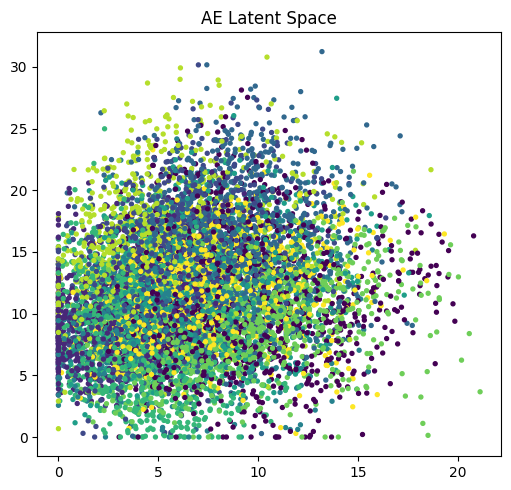

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(autoencoder_latent[:, 0], autoencoder_latent[:, 1], c=test_labels.numpy(), cmap='viridis', s=8)
plt.title('AE Latent Space')

plt.tight_layout()
plt.show()